<a href="https://colab.research.google.com/github/sahapranta/colabs/blob/main/laptop_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ydata_profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.3 MB/s eta 0:00:00


In [27]:
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
c1=plt.get_cmap('gist_rainbow_r')


# sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, PolynomialFeatures, FunctionTransformer
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('laptop-price.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [5]:
profile = ProfileReport(df, title="Laptop Price Report", explorative=True)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:00<00:00, 36.30it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'brand', 'name', 'price', 'spec_rating',
       'processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU',
       'display_size', 'resolution_width', 'resolution_height', 'OS',
       'warranty'],
      dtype='object')

In [14]:
# removing unnecessary columns
df = df.drop(df.columns[:2],axis=1)

df.spec_rating=round(df.spec_rating)

df.drop('name',axis=1,inplace=True)

print(df.duplicated().value_counts())

df.drop_duplicates(inplace=True)

df.drop(['display_size','warranty'],axis=1,inplace=True)

df.info()


False    891
True       2
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 892
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              891 non-null    object 
 1   price              891 non-null    int64  
 2   spec_rating        891 non-null    float64
 3   processor          891 non-null    object 
 4   CPU                891 non-null    object 
 5   Ram                891 non-null    object 
 6   Ram_type           891 non-null    object 
 7   ROM                891 non-null    object 
 8   ROM_type           891 non-null    object 
 9   GPU                891 non-null    object 
 10  resolution_width   891 non-null    float64
 11  resolution_height  891 non-null    float64
 12  OS                 891 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 97.5+ KB


In [15]:
X = df.drop(columns=['price'], axis=1)
y = df['price']

In [19]:
numeric_features = X.select_dtypes(include = ['int64','float64']).columns
categorical_features = X.select_dtypes(include = ['object']).columns

In [45]:
def log_transform(x):
    return np.log1p(x)

# for Numerical
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Impute first
    ('log', FunctionTransformer(func=log_transform)), # Log second
    ('scaler', RobustScaler())
])

# for Categorical
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [46]:
# Combine preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numeric_features),
    ('cat', cat_transformer, categorical_features)
], remainder='passthrough')

In [47]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [48]:
# base learner
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
svr = SVR(C=1.0, epsilon=0.1)
knn = KNeighborsRegressor(n_neighbors=5)

# Voting Regressor
voting_reg = VotingRegressor(
    estimators=[('lr', lr), ('rf', rf), ('gb', gb)]
)

# staking regressor
stacking_reg = StackingRegressor(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        # ('svr', svr), # SVR added
        ('knn', knn)
    ],
    final_estimator=Ridge()
)

In [49]:
#dict of all models
models = {
    'Linear Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'SVR': svr,
    'KNN': knn,
    'Voting Regressor': voting_reg,
    'Stacking Regressor': stacking_reg
}

In [50]:
# Training and evaluation
results = {}
trained_pipelines = {}

for name, model in models.items():
  print(f"Training {name}...")

  # create pipeline
  pipeline = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('model', model)
  ])

  # fit pipeline
  pipeline.fit(X_train, y_train)

  y_pred = pipeline.predict(X_test)
  trained_pipelines[name] = pipeline

  # evaluation metrics
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  rmse = np.sqrt(mse)

  results[name] = {
      'MSE': mse,
      'MAE': mae,
      'R2': r2,
      'RMSE': rmse
  }

result_df = pd.DataFrame(results).T
result_df.sort_values(by='R2', ascending=False, inplace=True)
result_df

Training Linear Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training SVR...
Training KNN...
Training Voting Regressor...
Training Stacking Regressor...


,MSE,MAE,R2,RMSE
Voting Regressor,5.017947e+08,13285.576696,0.880961,22400.774663
Random Forest,5.805616e+08,14025.408826,0.862276,24094.845452
Gradient Boosting,7.049397e+08,16205.078083,0.832770,26550.700046
Linear Regression,7.903861e+08,15821.610198,0.812500,28113.807028
Stacking Regressor,8.141438e+08,14803.783220,0.806864,28533.204398
KNN,9.357177e+08,14856.520670,0.778023,30589.502828
Decision Tree,1.314073e+09,18227.467412,0.688268,36250.147398
SVR,4.663704e+09,40717.314523,-0.106352,68291.318110


In [51]:
best_model_name = result_df['R2'].idxmax()
final_model = trained_pipelines[best_model_name]
final_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log',
                                                                   FunctionTransformer(func=<function log_transform at 0x7b9ad2b359e0>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['spec_rating', 'resolution_width', 'resolution_height'], dtype='object')),
                                                 ('cat',
                                                  Pipelin...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['brand', 'processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type',
       'GPU', 'OS'],
      dtype='object'))])),
                ('model',
                 VotingRegressor(estimators=[('lr', LinearRegression()),
                                             ('rf',
                                              RandomForestRegressor(random_state=42)),
                                             ('gb',
                                              GradientBoostingRegressor(random_state=42))]))])

In [52]:
scores = cross_val_score(final_model, X, y, cv=5, scoring='r2')
print(f"Average R2 Score: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

Average R2 Score: 0.7587
Standard Deviation: 0.0519


In [53]:
y_final_pred = final_model.predict(X_test)

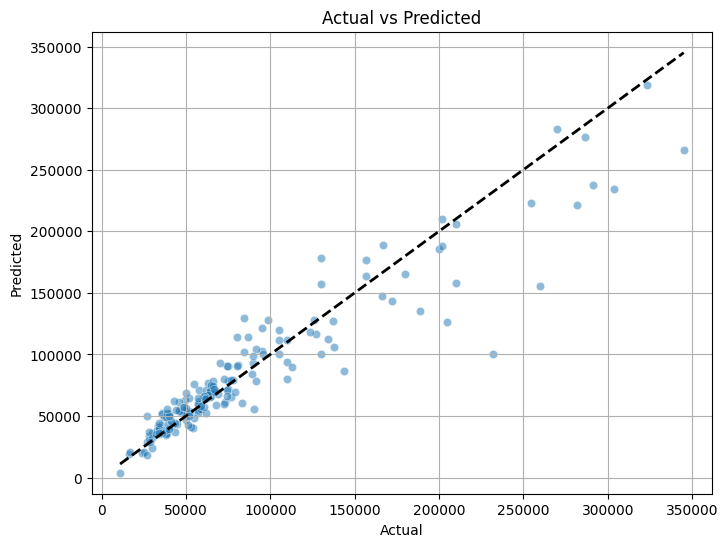

In [54]:
# plot Actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_final_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()